In [0]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
data.drop(columns=['keyword', 'location', 'id'], inplace=True)

In [7]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 12)                204       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
modelo = model.fit(training_padded, y_train, epochs=200, batch_size=64)

Epoch 1/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9199
Epoch 2/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2133 - accuracy: 0.9174
Epoch 3/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.9189
Epoch 4/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9182
Epoch 5/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.9204
Epoch 6/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2107 - accuracy: 0.9208
Epoch 7/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.9206
Epoch 8/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2084 - accuracy: 0.9193
Epoch 9/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9219
Epoch 10/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9186
Epoch 11/

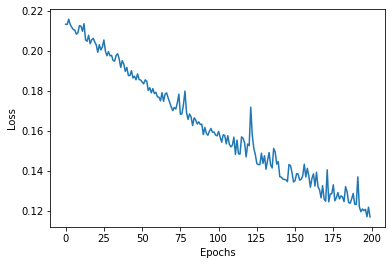

In [18]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

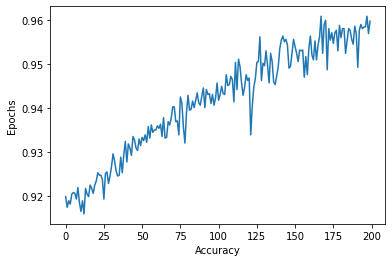

In [19]:
plt.plot(modelo.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()

In [0]:
# Evaluate:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Loss Test Set: {}'.format(test_loss))
print('Accuracy Test Set: {}'.format(test_acc))